# CUSTOMER SEGMENTATION

Dataset ***OnlineRetail.csv*** contains all the transactions occuring between 01-Dec-2010 and 09-Dec-2011 for a UK-based and registered non-store online retail.

<u><h3><b>Business Goal</b></h3></u>
Aimed to segment the Customers so that company can efficiently target its customers.

**Steps involve in the Customer Segmentation are categorized into following:**
1. Reading and Understanding Dataset.
1. Cleaning the Data.
1. Data Preparation.
1. Building the Model.
1. Final Analysis.

<b><h2>STEP-01: Reading and Understanding Data</h2></b>

In [3]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

#Reading dataset
dataset = pd.read_csv("E:\\ML Zero to Hero\\OnlineRetail.csv",sep=",",encoding="ISO-8859-1",header=0)
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
print(dataset.shape)

(541909, 8)


In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


<b><h2>STEP-02: Cleaning the Data</h2></b>

In [9]:
#Checking the total quantity and then percentage of null value in each column
print(dataset.isnull().sum())
print(round(100*(dataset.isnull().sum()/len(dataset)),2))

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64


In [10]:
#Droping the missing data
dataset = dataset.dropna()
dataset.shape

(406829, 8)

In [11]:
#Changing the customerID in int form - as per user requirement
dataset["CustomerID"] = dataset["CustomerID"].astype("int")
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom


<b><h2>STEP-03: Data Preparation</h2></b>


Analyzing the customer data based on the following 3 factors:
1. Frequency(F) = Number of transaction
1. Recency(R) = Number of days since last purchase
1. Monetary(M) = Total amount of transaction

In [23]:
# Frequency (F)
rfm_f = dataset.groupby("CustomerID")["InvoiceNo"].count()
rfm_f = rfm_f.reset_index()

rfm_f.columns=["CustomerID","Frequency"]
rfm_f.head()

,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [24]:
# Monetary (M)
# Amount = Quantity * Unit Price

dataset["Amount"]=dataset["Quantity"]*dataset["UnitPrice"]
rfm_m = dataset.groupby("CustomerID")["Amount"].sum()

rfm_m = rfm_m.reset_index()
rfm_m.column = ["CustomerID","Amount"]
rfm_m.head()

<ipython-input-24-5ff89bf5bf80>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  rfm_m.column = ["CustomerID","Amount"]


,CustomerID,Amount
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [25]:
# Merging two dataframes on CustomerID
rfm = pd.merge(rfm_m,rfm_f, on='CustomerID',how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346,0.00,2
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


In [42]:
# Recency (R)
#Converting date-time into proper format

dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'],format='%d-%m-%Y %H:%M')
dataset['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [43]:
#Getting max date
max_date=max(dataset["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:50:00')

In [44]:
#Adding Diff column in dataset
dataset["Diff"]=max_date-dataset["InvoiceDate"]
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00


In [45]:
# Compute last transaction date to get the recency of the customer
rfm_p = dataset.groupby('CustomerID')['Diff'].min()
rfm_p=rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346,325 days 02:33:00
1,12347,1 days 20:58:00
2,12348,74 days 23:37:00
3,12349,18 days 02:59:00
4,12350,309 days 20:49:00


In [46]:
# Extracting number of days only
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


In [47]:
# Merge the dataframe to get the final RFM dataframe
rfm = pd.merge(rfm,rfm_p,on='CustomerID',how='inner')
rfm.columns = ['CustomerID','Amount','Frequency','Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


<h4><b>OUTLIER ANALYSIS</b></h4>

After analyzing the outlier in *Frequency, Recency and Amount*, We will treat the following two types of outlier
- **Statistical**
- **Domain Specific**

Text(0, 0.5, 'Range')

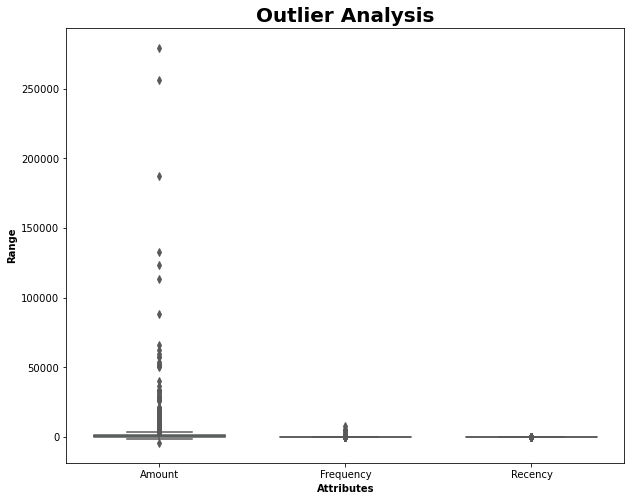

In [48]:
#Analyzing outlier in Frequency and Recency
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize']=[10,8]

#Plotting boxplot
sns.boxplot(data=rfm[attributes], orient="v", palette="Set2",whis=1.5,saturation=1,width=0.7)
plt.title("Outlier Analysis", fontsize=20, fontweight='bold')
plt.xlabel("Attributes", fontweight='bold')
plt.ylabel("Range", fontweight='bold')

<h3><i>Removing Statistical Outlier</i></h3>

In [63]:
# Removing (Statistical) Outlier - For Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm=rfm[(rfm.Amount >= Q1 - IQR*1.5) & (rfm.Amount <= Q3 + IQR * 1.5)]


# Removing (Statistical) Outlier - For Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= 1.5 * IQR)]

# Removing (Statistical) Outlier - For Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]


<h3><i>Re-Scaling the Attributes</i></h3>

Rescaling can be done in following two ways:
1. Standardization
1. MaxScaling

I'll use Standardization to rescale the attributes

In [64]:
rfm.shape

(4143, 4)

In [66]:
#Rescaling attributes
rfm_df = rfm[["Amount","Frequency","Recency"]]
scaler = StandardScaler()
rfm_df_scale = scaler.fit_transform(rfm_df)
rfm.shape

(4143, 4)

In [68]:
rfm_df_scale = pd.DataFrame(rfm_df_scale)
rfm_df_scale.columns = ["Amount","Frequency","Recency"]
rfm_df_scale.head()

,Amount,Frequency,Recency
0,-0.814270,-0.900158,2.259572
1,2.401560,1.698353,-0.928057
2,0.526708,-0.481509,-0.209857
3,0.497094,0.124810,-0.760805
4,-0.564764,-0.683615,2.102158


<b><h2>STEP-04: Building the model</h2></b>


I'll apply unsupervised learning algorithm to built the model for customer segmentation. One of the most simplest Unsupervised learning algorithm is **K-Mean Clustering*

1. At first, I will initialize k points randomly.
1. Then categorize each item to its closest mean and update the mean's coordinates.
1. Repeat the process for specific number of iteration untill we have our clusters

In [71]:
kmean = KMeans(n_clusters=4, max_iter=50)
kmean.fit(rfm_df_scale)

KMeans(max_iter=50, n_clusters=4)

In [72]:
kmean.labels_

array([2, 1, 0, ..., 2, 0, 3])

<h3><i>Finding number of optimal cluster</i></h3>


I'll use **Elbow method** to find the optimal number of clusters for given dataset

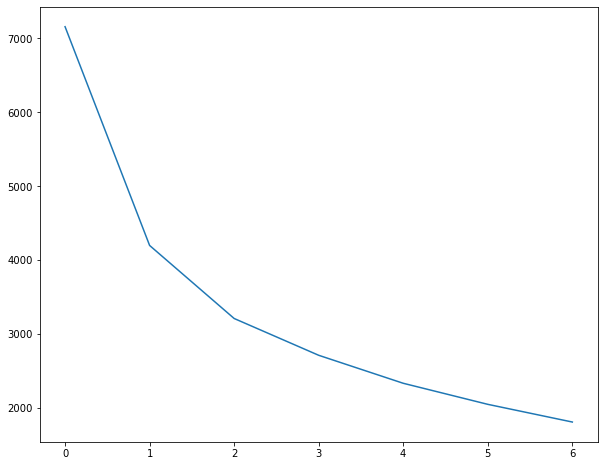

In [76]:
ssd=[]
n_cluster_range = [2,3,4,5,6,7,8]
for num_cluster in n_cluster_range:
    kmean = KMeans(n_clusters=num_cluster, max_iter=50)
    kmean.fit(rfm_df_scale)
    
    ssd.append(kmean.inertia_)
    
plt.plot(ssd)

<h3><i>Silhouette Analysis</i></h3>


$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$
$p$ = the mean distance to the points in the nearest cluster that the data point is not a part of
$q$ =  mean intra-cluster distance to all the points in its own cluster

- **Silhouette Range = -1 to 1**

- **Close to 1 means** data point is similar to other data points in the same cluster.
- **Close to -1 means** data point is not similar to other data points in the same cluster.